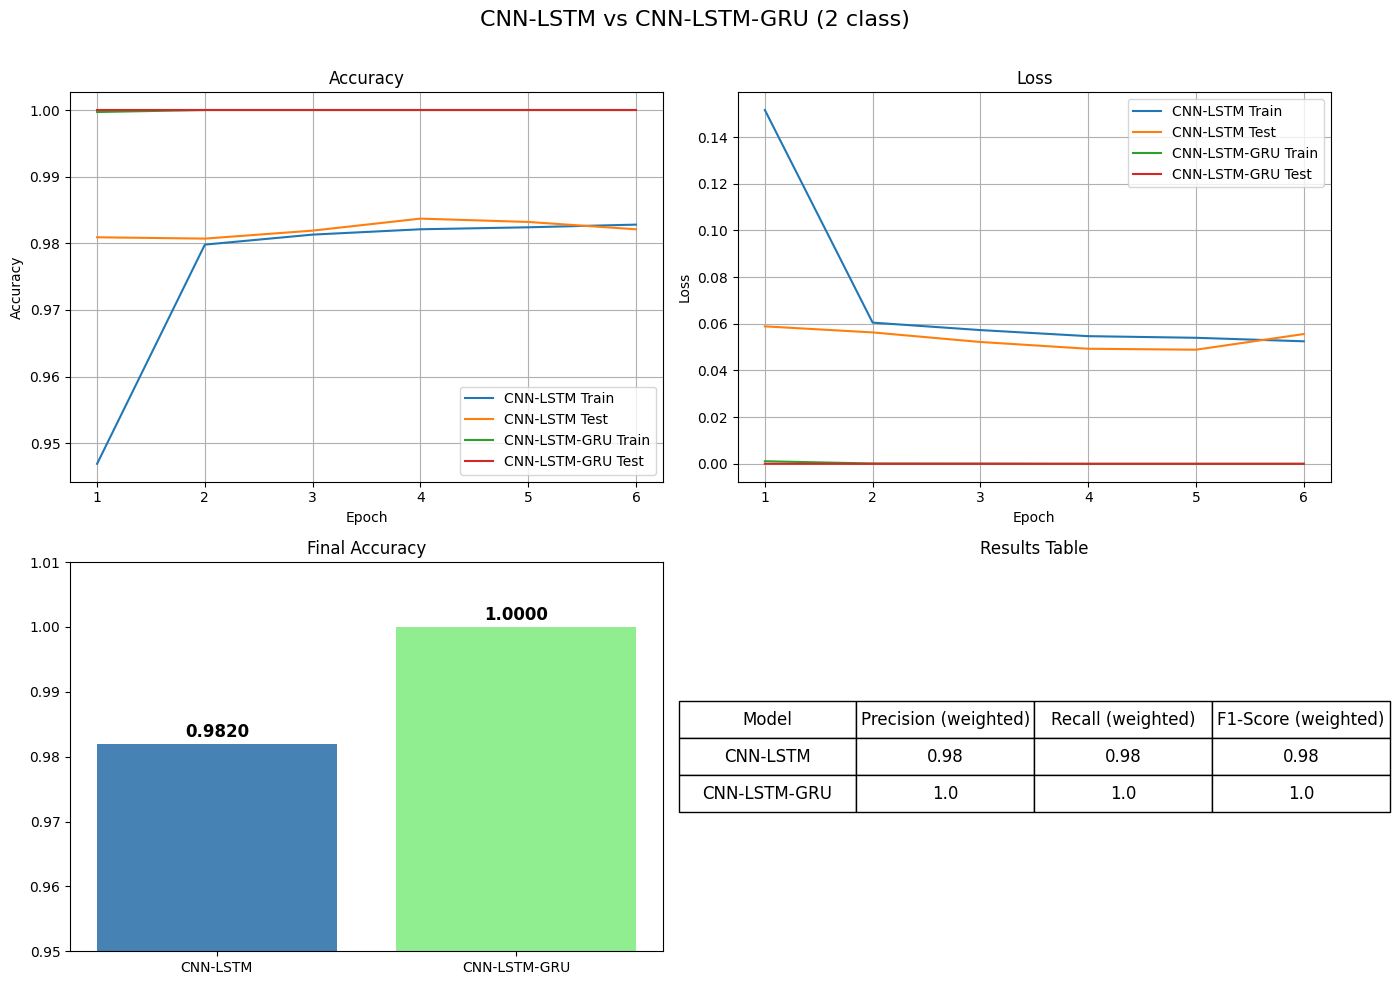

In [3]:
# 2 Class CNN-LSTM vs CNN-LSTM-GRU Comparison:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# CNN-LSTM
cnn_lstm_epochs = np.arange(1, 7)
cnn_lstm_train_acc = [0.9469, 0.9798, 0.9813, 0.9821, 0.9824, 0.9828]
cnn_lstm_test_acc = [0.9809, 0.9807, 0.9819, 0.9837, 0.9832, 0.9821]
cnn_lstm_train_loss = [0.1516, 0.0605, 0.0573, 0.0547, 0.0540, 0.0525]
cnn_lstm_test_loss = [0.0589, 0.0563, 0.0522, 0.0493, 0.0489, 0.0556]
cnn_lstm_final_test_acc = 0.9820
cnn_lstm_final_test_loss = 0.0559

# CNN-LSTM-GRU
cnn_lstm_gru_epochs = np.arange(1, 7)
cnn_lstm_gru_train_acc = [0.9997, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]
cnn_lstm_gru_test_acc = [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]
cnn_lstm_gru_train_loss = [0.0011, 0.0001306, 0.000081947, 2.1156e-10, 1.4664e-11, 7.5520e-11]
cnn_lstm_gru_test_loss = [6.0838e-07, 4.6583e-11, 1.1399e-15, 4.3320e-19, 7.3978e-20, 7.3541e-21]
cnn_lstm_gru_final_test_acc = 1.0000
cnn_lstm_gru_final_test_loss = 0.0000


fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("CNN-LSTM vs CNN-LSTM-GRU (2 class)", fontsize=16)

# accuracy
axs[0, 0].plot(cnn_lstm_epochs, cnn_lstm_train_acc, label='CNN-LSTM Train')
axs[0, 0].plot(cnn_lstm_epochs, cnn_lstm_test_acc, label='CNN-LSTM Test')
axs[0, 0].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_train_acc, label='CNN-LSTM-GRU Train')
axs[0, 0].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_test_acc, label='CNN-LSTM-GRU Test')
axs[0, 0].set_title("Accuracy")
axs[0, 0].set_xlabel("Epoch")
axs[0, 0].set_ylabel("Accuracy")
axs[0, 0].legend()
axs[0, 0].grid(True)

# loss
axs[0, 1].plot(cnn_lstm_epochs, cnn_lstm_train_loss, label='CNN-LSTM Train')
axs[0, 1].plot(cnn_lstm_epochs, cnn_lstm_test_loss, label='CNN-LSTM Test')
axs[0, 1].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_train_loss, label='CNN-LSTM-GRU Train')
axs[0, 1].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_test_loss, label='CNN-LSTM-GRU Test')
axs[0, 1].set_title("Loss")
axs[0, 1].set_xlabel("Epoch")
axs[0, 1].set_ylabel("Loss")
axs[0, 1].legend()
axs[0, 1].grid(True)

# accuracy table
models = ['CNN-LSTM', 'CNN-LSTM-GRU']
test_accs = [cnn_lstm_final_test_acc, cnn_lstm_gru_final_test_acc]
axs[1, 0].bar(models, test_accs, color=['steelblue', 'lightgreen'])
axs[1, 0].set_title("Final Accuracy")
axs[1, 0].set_ylim([0.95, 1.01])
for i, acc in enumerate(test_accs):
    axs[1, 0].text(i, acc + 0.001, f"{acc:.4f}", ha='center', fontsize=12, fontweight='bold')

# table
results = pd.DataFrame({
    "Model": models,
    "Precision (weighted)": [0.98, 1.00],
    "Recall (weighted)": [0.98, 1.00],
    "F1-Score (weighted)": [0.98, 1.00]
})
axs[1, 1].axis('off')
table = axs[1, 1].table(cellText=results.values, colLabels=results.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 2.0)
axs[1, 1].set_title("Results Table")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


<h1>Explanation For The Results:</h1>

<p>Based on the results, the CNN-LSTM model showed weaker performance compared to the CNN-LSTM-GRU architecture due to limitations in its sequential processing capabilities and gradient propagation mechanisms. The CNN-LSTM model reached a final test accuracy of 98.20% and a final loss of 0.0559, showing decent but not perfect classification performance. In contrast, the CNN-LSTM-GRU model achieved perfect classification performance with 100% accuracy and almost zero loss across all evaluation metrics. The better performance of the CNN-LSTM-GRU architecture can be explained by its parts. The GRUs simplify the architecture by combining the cell and hidden states into a single part, making the model less complex and computationally more efficient compared to LSTMs, while still keeping the ability to capture long-term dependencies. When combined with the CNN's spatial feature extraction capabilities and LSTM's temporal modeling strengths, this creates a more solid ensemble that reduces the vanishing gradient problem and improves the model's ability to learn spatial and temporal patterns in the data. The results consistently showed that the CNN-LSTM-GRU produced superior outcomes because the gating mechanisms and complexity are better for this type of classification.</p>

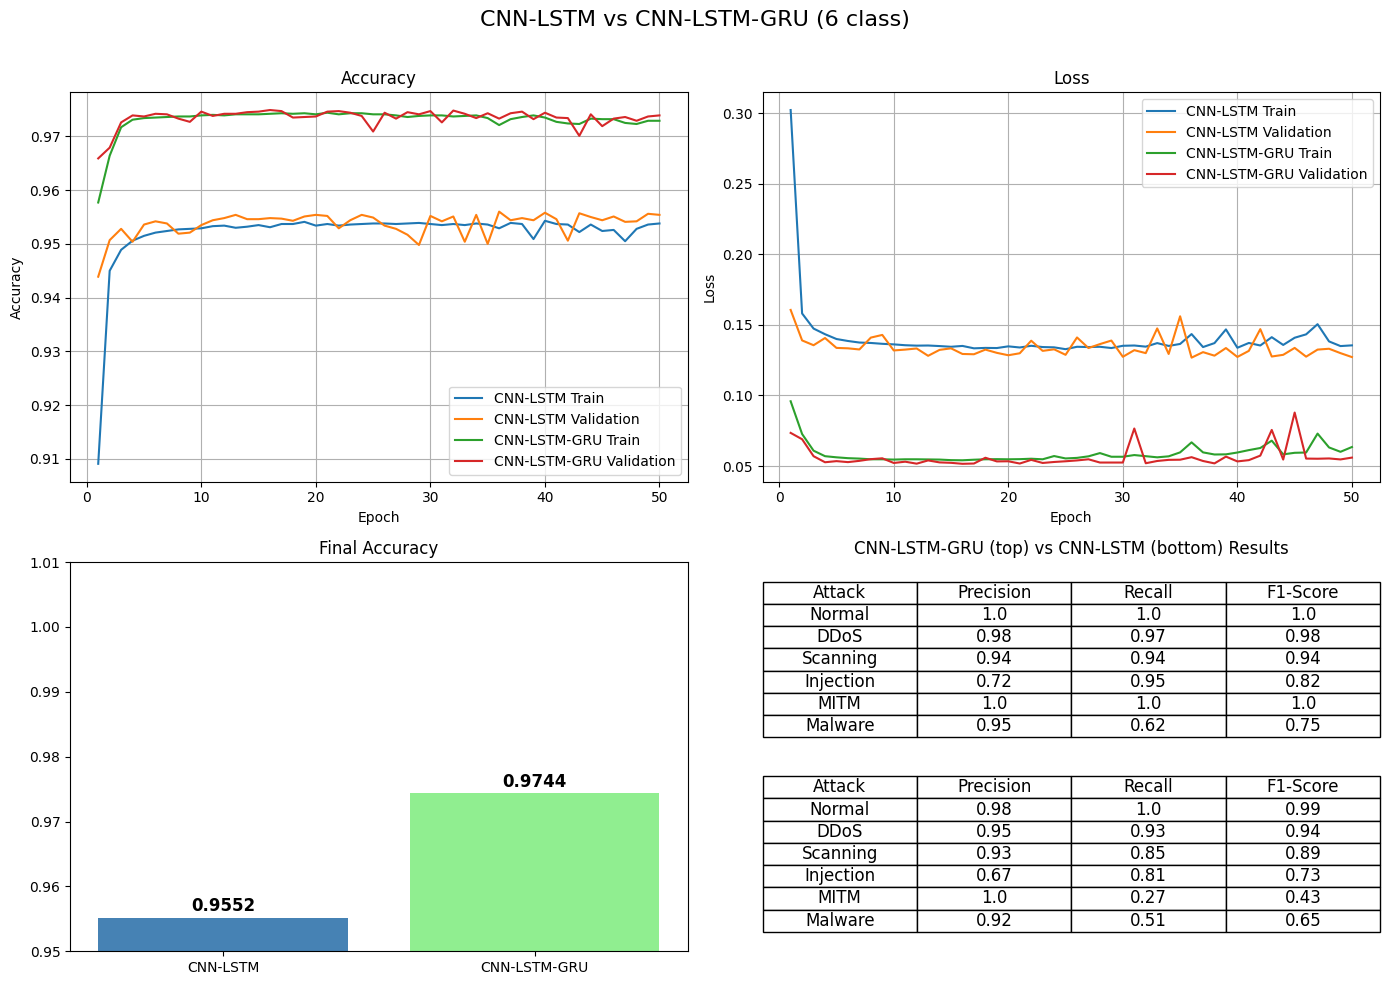

In [28]:
# 6 Class CNN-LSTM vs CNN-LSTM-GRU Comparison:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# CNN-LSTM
cnn_lstm_epochs = np.arange(1, 51)
cnn_lstm_train_acc = [0.9091, 0.9450, 0.9489, 0.9506, 0.9515, 0.9521, 0.9524, 0.9527, 0.9528, 0.9529, 0.9533, 0.9534, 0.9530, 0.9532, 0.9535, 0.9531, 0.9537, 0.9537, 0.9541, 0.9534, 0.9537, 0.9534, 0.9536, 0.9537, 0.9538, 0.9538, 0.9537, 0.9538, 0.9539, 0.9537, 0.9535, 0.9537, 0.9535, 0.9538, 0.9536, 0.9529, 0.9539, 0.9537, 0.9509, 0.9543, 0.9537, 0.9536, 0.9522, 0.9536, 0.9524, 0.9526, 0.9505, 0.9528, 0.9536, 0.9538]
cnn_lstm_val_acc = [0.9439, 0.9507, 0.9528, 0.9504, 0.9536, 0.9542, 0.9538, 0.9519, 0.9521, 0.9535, 0.9544, 0.9548, 0.9554, 0.9546, 0.9546, 0.9548, 0.9547, 0.9543, 0.9551, 0.9554, 0.9552, 0.9529, 0.9544, 0.9554, 0.9549, 0.9534, 0.9528, 0.9517, 0.9498, 0.9552, 0.9542, 0.9551, 0.9504, 0.9554, 0.9500, 0.9560, 0.9544, 0.9548, 0.9544, 0.9558, 0.9546, 0.9506, 0.9557, 0.9550, 0.9544, 0.9551, 0.9541, 0.9542, 0.9556, 0.9554]
cnn_lstm_train_loss = [0.3022, 0.1581, 0.1474, 0.1434, 0.1400, 0.1386, 0.1375, 0.1372, 0.1366, 0.1362, 0.1356, 0.1353, 0.1354, 0.1350, 0.1345, 0.1351, 0.1334, 0.1337, 0.1336, 0.1348, 0.1340, 0.1352, 0.1343, 0.1341, 0.1328, 0.1345, 0.1343, 0.1345, 0.1336, 0.1352, 0.1354, 0.1346, 0.1371, 0.1351, 0.1365, 0.1435, 0.1343, 0.1371, 0.1468, 0.1338, 0.1372, 0.1354, 0.1413, 0.1358, 0.1409, 0.1433, 0.1505, 0.1383, 0.1350, 0.1355]
cnn_lstm_val_loss = [0.1606, 0.1390, 0.1356, 0.1407, 0.1337, 0.1334, 0.1326, 0.1410, 0.1429, 0.1319, 0.1325, 0.1333, 0.1281, 0.1323, 0.1334, 0.1294, 0.1292, 0.1325, 0.1302, 0.1285, 0.1299, 0.1388, 0.1316, 0.1327, 0.1288, 0.1411, 0.1336, 0.1364, 0.1389, 0.1274, 0.1321, 0.1300, 0.1475, 0.1294, 0.1561, 0.1268, 0.1307, 0.1282, 0.1336, 0.1273, 0.1316, 0.1470, 0.1276, 0.1288, 0.1337, 0.1275, 0.1325, 0.1331, 0.1300, 0.1272]
cnn_lstm_final_test_acc = 0.9552
cnn_lstm_final_test_loss = 0.1270

# CNN-LSTM-GRU
cnn_lstm_gru_epochs = np.arange(1, 51)
cnn_lstm_gru_train_acc = [0.9577, 0.9664, 0.9717, 0.9731, 0.9734, 0.9735, 0.9736, 0.9737, 0.9737, 0.9739, 0.9740, 0.9739, 0.9741, 0.9741, 0.9741, 0.9742, 0.9743, 0.9742, 0.9743, 0.9741, 0.9744, 0.9741, 0.9743, 0.9743, 0.9741, 0.9741, 0.9739, 0.9736, 0.9738, 0.9739, 0.9739, 0.9737, 0.9738, 0.9739, 0.9734, 0.9721, 0.9732, 0.9736, 0.9739, 0.9735, 0.9727, 0.9724, 0.9723, 0.9733, 0.9732, 0.9732, 0.9725, 0.9723, 0.9729, 0.9729]
cnn_lstm_gru_val_acc = [0.9659, 0.9679, 0.9726, 0.9739, 0.9737, 0.9742, 0.9741, 0.9733, 0.9727, 0.9746, 0.9738, 0.9742, 0.9742, 0.9745, 0.9746, 0.9749, 0.9747, 0.9735, 0.9736, 0.9737, 0.9746, 0.9747, 0.9744, 0.9738, 0.9709, 0.9744, 0.9733, 0.9745, 0.9741, 0.9747, 0.9726, 0.9748, 0.9742, 0.9734, 0.9743, 0.9733, 0.9743, 0.9746, 0.9732, 0.9744, 0.9735, 0.9734, 0.9701, 0.9741, 0.9719, 0.9733, 0.9736, 0.9729, 0.9737, 0.9739]
cnn_lstm_gru_train_loss = [0.0959, 0.0727, 0.0609, 0.0570, 0.0562, 0.0556, 0.0553, 0.0548, 0.0548, 0.0546, 0.0548, 0.0548, 0.0547, 0.0546, 0.0542, 0.0541, 0.0545, 0.0548, 0.0549, 0.0548, 0.0549, 0.0552, 0.0548, 0.0571, 0.0554, 0.0558, 0.0569, 0.0592, 0.0566, 0.0566, 0.0578, 0.0570, 0.0562, 0.0569, 0.0597, 0.0668, 0.0597, 0.0582, 0.0583, 0.0596, 0.0613, 0.0628, 0.0680, 0.0583, 0.0594, 0.0596, 0.0730, 0.0632, 0.0601, 0.0635]
cnn_lstm_gru_val_loss = [0.0735, 0.0690, 0.0570, 0.0527, 0.0535, 0.0528, 0.0537, 0.0549, 0.0555, 0.0522, 0.0531, 0.0517, 0.0540, 0.0526, 0.0523, 0.0516, 0.0518, 0.0559, 0.0533, 0.0534, 0.0518, 0.0544, 0.0522, 0.0529, 0.0534, 0.0540, 0.0548, 0.0525, 0.0525, 0.0525, 0.0766, 0.0520, 0.0536, 0.0544, 0.0545, 0.0563, 0.0536, 0.0519, 0.0567, 0.0533, 0.0542, 0.0574, 0.0756, 0.0546, 0.0879, 0.0553, 0.0552, 0.0554, 0.0547, 0.0560]
cnn_lstm_gru_final_test_acc = 0.9744
cnn_lstm_gru_final_test_loss = 0.0532


fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("CNN-LSTM vs CNN-LSTM-GRU (6 class)", fontsize=16)

# accuracy
axs[0, 0].plot(cnn_lstm_epochs, cnn_lstm_train_acc, label='CNN-LSTM Train')
axs[0, 0].plot(cnn_lstm_epochs, cnn_lstm_val_acc, label='CNN-LSTM Validation')
axs[0, 0].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_train_acc, label='CNN-LSTM-GRU Train')
axs[0, 0].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_val_acc, label='CNN-LSTM-GRU Validation')
axs[0, 0].set_title("Accuracy")
axs[0, 0].set_xlabel("Epoch")
axs[0, 0].set_ylabel("Accuracy")
axs[0, 0].legend()
axs[0, 0].grid(True)

# loss
axs[0, 1].plot(cnn_lstm_epochs, cnn_lstm_train_loss, label='CNN-LSTM Train')
axs[0, 1].plot(cnn_lstm_epochs, cnn_lstm_val_loss, label='CNN-LSTM Validation')
axs[0, 1].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_train_loss, label='CNN-LSTM-GRU Train')
axs[0, 1].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_val_loss, label='CNN-LSTM-GRU Validation')
axs[0, 1].set_title("Loss")
axs[0, 1].set_xlabel("Epoch")
axs[0, 1].set_ylabel("Loss")
axs[0, 1].legend()
axs[0, 1].grid(True)

# accuracy table
models = ['CNN-LSTM', 'CNN-LSTM-GRU']
test_accs = [cnn_lstm_final_test_acc, cnn_lstm_gru_final_test_acc]
axs[1, 0].bar(models, test_accs, color=['steelblue', 'lightgreen'])
axs[1, 0].set_title("Final Accuracy")
axs[1, 0].set_ylim([0.95, 1.01])
for i, acc in enumerate(test_accs):
    axs[1, 0].text(i, acc + 0.001, f"{acc:.4f}", ha='center', fontsize=12, fontweight='bold')

# table
results_cnn_lstm_gru = pd.DataFrame({
    "Attack": ["Normal", "DDoS", "Scanning", "Injection", "MITM", "Malware"],
    "Precision": [1.00, 0.98, 0.94, 0.72, 1.00, 0.95],
    "Recall": [1.00, 0.97, 0.94, 0.95, 1.00, 0.62],
    "F1-Score": [1.00, 0.98, 0.94, 0.82, 1.00, 0.75]
})

results_cnn_lstm = pd.DataFrame({
    "Attack": ["Normal", "DDoS", "Scanning", "Injection", "MITM", "Malware"],
    "Precision": [0.98, 0.95, 0.93, 0.67, 1.00, 0.92],
    "Recall": [1.00, 0.93, 0.85, 0.81, 0.27, 0.51],
    "F1-Score": [0.99, 0.94, 0.89, 0.73, 0.43, 0.65]
})

# CNN-LSTM-GRU table
axs[1, 1].axis('off')
table_cnn_lstm_gru = axs[1, 1].table(cellText=results_cnn_lstm_gru.values, colLabels=results_cnn_lstm_gru.columns, loc='center', cellLoc='center', bbox=[0, 0.55, 1, 0.4])
table_cnn_lstm_gru.auto_set_font_size(False)
table_cnn_lstm_gru.set_fontsize(12)
table_cnn_lstm_gru.scale(1.2, 1.2)

# CNN-LSTM table
table_cnn_lstm = axs[1, 1].table(cellText=results_cnn_lstm.values, colLabels=results_cnn_lstm.columns, loc='center', cellLoc='center', bbox=[0, 0.05, 1, 0.4])
table_cnn_lstm.auto_set_font_size(False)
table_cnn_lstm.set_fontsize(12)
table_cnn_lstm.scale(1.2, 1.2)
axs[1, 1].set_title("CNN-LSTM-GRU (top) vs CNN-LSTM (bottom) Results")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


<h1>Explanation For The Results:</h1>

<p>Based on the results for the 6-class classification task, the CNN-LSTM model showed weaker performance compared to the CNN-LSTM-GRU architecture due to limitations in its sequential processing capabilities and gradient propagation mechanisms. The CNN-LSTM model had a final test accuracy of 95.52% and a final loss of 0.1270, showing decent but not perfect classification performance across the six attack categories. In contrast, the CNN-LSTM-GRU model achieved better classification performance with 97.44% accuracy and a lower final loss of 0.0532 across all evaluation metrics. The better performance of the CNN-LSTM-GRU architecture is shown when looking at results from each attack type. While both models performed well on Normal, DDoS, and Scanning attacks, the CNN-LSTM struggled with classes like MITM (recall of 0.27) and Malware (recall of 0.51), while the CNN-LSTM-GRU maintained strong performance across all classes with perfect scores for Normal and MITM attacks. This improved performance occurs because the GRUs simplify the architecture by combining cell and hidden states into a single part, making the model less complex and more efficient compared to traditional LSTMs, while still keeping the ability to capture long-term dependencies. When combined with the CNN's spatial feature extraction and LSTM's temporal sequence processing, it creates a more solid ensemble that reduces the vanishing gradient problem and improves the model's ability to learn more complex spatial and temporal patterns, especially for skewed class distribution (which creates challenges for learning patterns).</p>

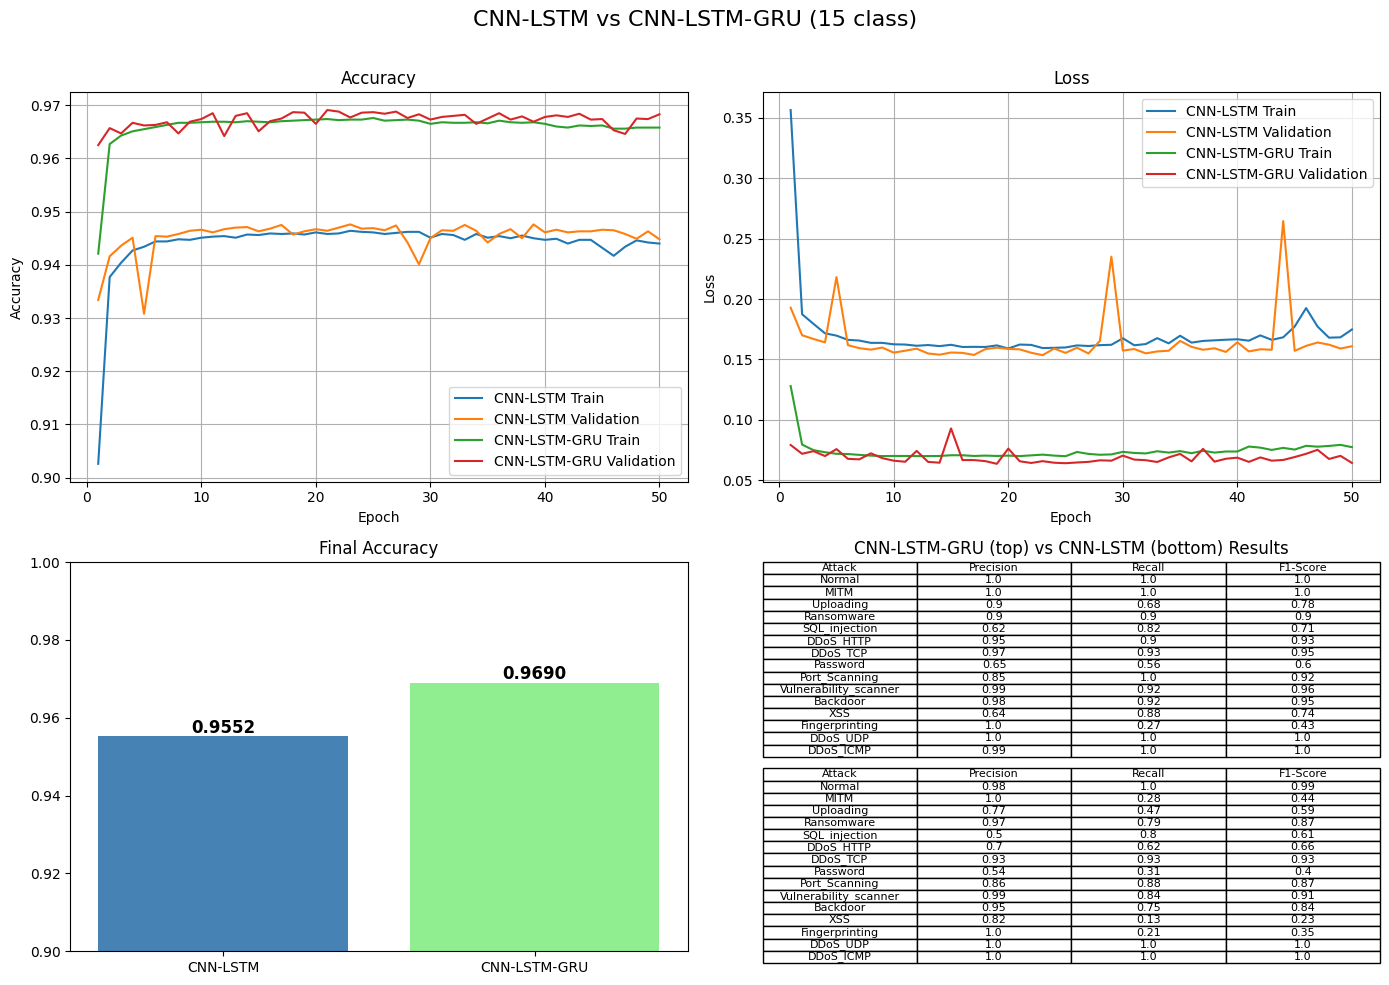

In [13]:
# 15 Class CNN-LSTM vs CNN-LSTM-GRU Comparison:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# CNN-LSTM
cnn_lstm_epochs = np.arange(1, 51)
cnn_lstm_train_acc = [0.9026, 0.9377, 0.9404, 0.9427, 0.9434, 0.9444, 0.9444, 0.9448, 0.9447, 0.9451, 0.9453, 0.9454, 0.9451, 0.9457, 0.9456, 0.9459, 0.9458, 0.9459, 0.9457, 0.9461, 0.9458, 0.9459, 0.9464, 0.9462, 0.9461, 0.9458, 0.9460, 0.9462, 0.9462, 0.9451, 0.9458, 0.9456, 0.9447, 0.9458, 0.9451, 0.9454, 0.9450, 0.9455, 0.9450, 0.9447, 0.9449, 0.9440, 0.9447, 0.9447, 0.9432, 0.9417, 0.9434, 0.9446, 0.9442, 0.9440]
cnn_lstm_val_acc = [0.9334, 0.9416, 0.9436, 0.9451, 0.9308, 0.9454, 0.9453, 0.9458, 0.9464, 0.9466, 0.9461, 0.9467, 0.9470, 0.9471, 0.9463, 0.9468, 0.9475, 0.9457, 0.9463, 0.9467, 0.9464, 0.9470, 0.9476, 0.9468, 0.9469, 0.9465, 0.9474, 0.9442, 0.9401, 0.9450, 0.9465, 0.9464, 0.9475, 0.9464, 0.9442, 0.9458, 0.9467, 0.9450, 0.9476, 0.9461, 0.9466, 0.9461, 0.9463, 0.9463, 0.9466, 0.9465, 0.9458, 0.9449, 0.9463, 0.9448]
cnn_lstm_train_loss = [0.3566, 0.1874, 0.1794, 0.1716, 0.1697, 0.1662, 0.1656, 0.1637, 0.1637, 0.1625, 0.1623, 0.1613, 0.1619, 0.1610, 0.1621, 0.1603, 0.1604, 0.1603, 0.1616, 0.1590, 0.1623, 0.1620, 0.1594, 0.1596, 0.1599, 0.1616, 0.1611, 0.1618, 0.1621, 0.1675, 0.1617, 0.1627, 0.1676, 0.1633, 0.1696, 0.1639, 0.1653, 0.1658, 0.1663, 0.1667, 0.1655, 0.1699, 0.1662, 0.1683, 0.1772, 0.1925, 0.1772, 0.1680, 0.1683, 0.1748]
cnn_lstm_val_loss = [0.1928, 0.1700, 0.1669, 0.1641, 0.2182, 0.1618, 0.1593, 0.1581, 0.1598, 0.1556, 0.1572, 0.1589, 0.1549, 0.1539, 0.1557, 0.1554, 0.1537, 0.1585, 0.1597, 0.1587, 0.1583, 0.1555, 0.1535, 0.1590, 0.1554, 0.1597, 0.1549, 0.1654, 0.2351, 0.1573, 0.1586, 0.1550, 0.1566, 0.1572, 0.1653, 0.1604, 0.1580, 0.1592, 0.1562, 0.1642, 0.1566, 0.1584, 0.1580, 0.2646, 0.1571, 0.1612, 0.1640, 0.1622, 0.1590, 0.1609]
cnn_lstm_final_test_acc = 0.9552
cnn_lstm_final_test_loss = 0.1270

# CNN-LSTM-GRU
cnn_lstm_gru_epochs = np.arange(1, 51)
cnn_lstm_gru_train_acc = [0.9421, 0.9627, 0.9643, 0.9651, 0.9655, 0.9659, 0.9663, 0.9667, 0.9667, 0.9668, 0.9669, 0.9669, 0.9668, 0.9670, 0.9669, 0.9668, 0.9670, 0.9671, 0.9672, 0.9673, 0.9674, 0.9672, 0.9673, 0.9673, 0.9676, 0.9671, 0.9672, 0.9673, 0.9671, 0.9665, 0.9668, 0.9667, 0.9667, 0.9668, 0.9666, 0.9671, 0.9668, 0.9667, 0.9668, 0.9665, 0.9660, 0.9658, 0.9662, 0.9661, 0.9662, 0.9656, 0.9656, 0.9658, 0.9658, 0.9658]
cnn_lstm_gru_val_acc = [0.9625, 0.9657, 0.9647, 0.9667, 0.9662, 0.9663, 0.9668, 0.9647, 0.9669, 0.9674, 0.9685, 0.9642, 0.9680, 0.9685, 0.9651, 0.9670, 0.9675, 0.9687, 0.9686, 0.9665, 0.9691, 0.9688, 0.9677, 0.9686, 0.9687, 0.9684, 0.9688, 0.9676, 0.9683, 0.9673, 0.9678, 0.9680, 0.9682, 0.9665, 0.9675, 0.9685, 0.9673, 0.9679, 0.9669, 0.9678, 0.9681, 0.9678, 0.9684, 0.9673, 0.9674, 0.9653, 0.9646, 0.9675, 0.9674, 0.9683 ]
cnn_lstm_gru_train_loss = [0.1279, 0.0794, 0.0748, 0.0731, 0.0718, 0.0716, 0.0709, 0.0703, 0.0699, 0.0700, 0.0700, 0.0699, 0.0699, 0.0700, 0.0706, 0.0706, 0.0700, 0.0703, 0.0700, 0.0703, 0.0699, 0.0705, 0.0711, 0.0703, 0.0698, 0.0733, 0.0717, 0.0710, 0.0713, 0.0734, 0.0725, 0.0721, 0.0739, 0.0728, 0.0740, 0.0723, 0.0743, 0.0728, 0.0737, 0.0737, 0.0778, 0.0769, 0.0750, 0.0767, 0.0753, 0.0784, 0.0777, 0.0783, 0.0792, 0.0773]
cnn_lstm_gru_val_loss = [0.0791, 0.0718, 0.0740, 0.0699, 0.0757, 0.0676, 0.0672, 0.0722, 0.0682, 0.0661, 0.0652, 0.0742, 0.0651, 0.0644, 0.0928, 0.0666, 0.0666, 0.0657, 0.0635, 0.0761, 0.0656, 0.0642, 0.0657, 0.0644, 0.0640, 0.0646, 0.0651, 0.0664, 0.0661, 0.0703, 0.0670, 0.0665, 0.0650, 0.0688, 0.0717, 0.0655, 0.0759, 0.0653, 0.0677, 0.0686, 0.0651, 0.0688, 0.0661, 0.0667, 0.0691, 0.0718, 0.0751, 0.0675, 0.0701, 0.0642]
cnn_lstm_gru_final_test_acc = 0.9690
cnn_lstm_gru_final_test_loss = 0.0632


fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("CNN-LSTM vs CNN-LSTM-GRU (15 class)", fontsize=16)

# accuracy
axs[0, 0].plot(cnn_lstm_epochs, cnn_lstm_train_acc, label='CNN-LSTM Train')
axs[0, 0].plot(cnn_lstm_epochs, cnn_lstm_val_acc, label='CNN-LSTM Validation')
axs[0, 0].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_train_acc, label='CNN-LSTM-GRU Train')
axs[0, 0].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_val_acc, label='CNN-LSTM-GRU Validation')
axs[0, 0].set_title("Accuracy")
axs[0, 0].set_xlabel("Epoch")
axs[0, 0].set_ylabel("Accuracy")
axs[0, 0].legend()
axs[0, 0].grid(True)

# loss
axs[0, 1].plot(cnn_lstm_epochs, cnn_lstm_train_loss, label='CNN-LSTM Train')
axs[0, 1].plot(cnn_lstm_epochs, cnn_lstm_val_loss, label='CNN-LSTM Validation')
axs[0, 1].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_train_loss, label='CNN-LSTM-GRU Train')
axs[0, 1].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_val_loss, label='CNN-LSTM-GRU Validation')
axs[0, 1].set_title("Loss")
axs[0, 1].set_xlabel("Epoch")
axs[0, 1].set_ylabel("Loss")
axs[0, 1].legend()
axs[0, 1].grid(True)

# accuracy table
models = ['CNN-LSTM', 'CNN-LSTM-GRU']
test_accs = [cnn_lstm_final_test_acc, cnn_lstm_gru_final_test_acc]
axs[1, 0].bar(models, test_accs, color=['steelblue', 'lightgreen'])
axs[1, 0].set_title("Final Accuracy")
axs[1, 0].set_ylim([0.90, 1.00])
for i, acc in enumerate(test_accs):
    axs[1, 0].text(i, acc + 0.001, f"{acc:.4f}", ha='center', fontsize=12, fontweight='bold')

# table
results_cnn_lstm_gru = pd.DataFrame({
    "Attack": ["Normal", "MITM", "Uploading", "Ransomware", "SQL_injection", "DDoS_HTTP", "DDoS_TCP", "Password", "Port_Scanning", "Vulnerability_scanner", "Backdoor", "XSS", "Fingerprinting", "DDoS_UDP", "DDoS_ICMP"],
    "Precision": [1.00, 1.00, 0.90, 0.90, 0.62, 0.95, 0.97, 0.65, 0.85, 0.99, 0.98, 0.64, 1.00, 1.00, 0.99],
    "Recall": [1.00, 1.00, 0.68, 0.90, 0.82, 0.90, 0.93, 0.56, 1.00, 0.92, 0.92, 0.88, 0.27, 1.00, 1.00],
    "F1-Score": [1.00, 1.00, 0.78, 0.90, 0.71, 0.93, 0.95, 0.60, 0.92, 0.96, 0.95, 0.74, 0.43, 1.00, 1.00]

})

results_cnn_lstm = pd.DataFrame({
    "Attack": ["Normal", "MITM", "Uploading", "Ransomware", "SQL_injection", "DDoS_HTTP", "DDoS_TCP", "Password", "Port_Scanning", "Vulnerability_scanner", "Backdoor", "XSS", "Fingerprinting", "DDoS_UDP", "DDoS_ICMP"],
    "Precision": [0.98, 1.00, 0.77, 0.97, 0.50, 0.70, 0.93, 0.54, 0.86, 0.99, 0.95, 0.82, 1.00, 1.00, 1.00],
    "Recall": [1.00, 0.28, 0.47, 0.79, 0.80, 0.62, 0.93, 0.31, 0.88, 0.84, 0.75, 0.13, 0.21, 1.00, 1.00],
    "F1-Score": [0.99, 0.44, 0.59, 0.87, 0.61, 0.66, 0.93, 0.40, 0.87, 0.91, 0.84, 0.23, 0.35, 1.00, 1.00]
})

# CNN-LSTM-GRU table
axs[1, 1].axis('off')
table_cnn_lstm_gru = axs[1, 1].table(cellText=results_cnn_lstm_gru.values, colLabels=results_cnn_lstm_gru.columns, loc='center', cellLoc='center', bbox=[0, 0.50, 1, 0.5])
table_cnn_lstm_gru.auto_set_font_size(False)
table_cnn_lstm_gru.set_fontsize(8)
table_cnn_lstm_gru.scale(1.2, 1.2)

# CNN-LSTM table
table_cnn_lstm = axs[1, 1].table(cellText=results_cnn_lstm.values, colLabels=results_cnn_lstm.columns, loc='center', cellLoc='center', bbox=[0, -0.03, 1, 0.5])
table_cnn_lstm.auto_set_font_size(False)
table_cnn_lstm.set_fontsize(8)
table_cnn_lstm.scale(1.2, 1.2)
axs[1, 1].set_title("CNN-LSTM-GRU (top) vs CNN-LSTM (bottom) Results")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

<h1>Explanation For The Results:</h1>

<p>Based on the results for the 15-class classification, the CNN-LSTM model showed weaker performance compared to the CNN-LSTM-GRU architecture because of limitations in its sequential processing capabilities and gradient propagation mechanisms. The CNN-LSTM model reached a final test accuracy of 95.52% and a final loss of 0.1270, showing decent but not perfect classification performance across the fifteen attacks. The CNN-LSTM-GRU model achieved better classification performance with a final accuracy of 96.90% and a final loss of 0.0632. The better performance of the CNN-LSTM-GRU architecture is shown when looking at the results from each attack. While both models performed well on common attack types like Normal, DDoS_UDP, and DDoS_ICMP, the CNN-LSTM struggled with smaller classes such as MITM (recall of 0.28), XSS (recall of 0.13), Fingerprinting (recall of 0.21), and Password attacks (recall of 0.31), while the CNN-LSTM-GRU maintained much stronger performance across all classes with perfect scores for Normal, MITM, DDoS_UDP, and DDoS_ICMP attacks, and better recall for challenging classes like XSS (0.88 vs 0.13) and Fingerprinting (0.27 vs 0.21). This improved performance can be explained by the way the architecture's parts work together. GRUs simplify the architecture by combining cell and hidden states into a single part, making the model less complex and computationally more efficient compared to traditional LSTMs, while still keeping the ability to capture long-term dependencies. When combined with the CNN's spatial feature extraction and the LSTM's temporal sequence processing, it creates a more solid ensemble that reduces the vanishing gradient problem and improves the model's ability to learn more complex spatial and temporal patterns, especially for skewed class distribution (which creates challenges for learning patterns).</p>

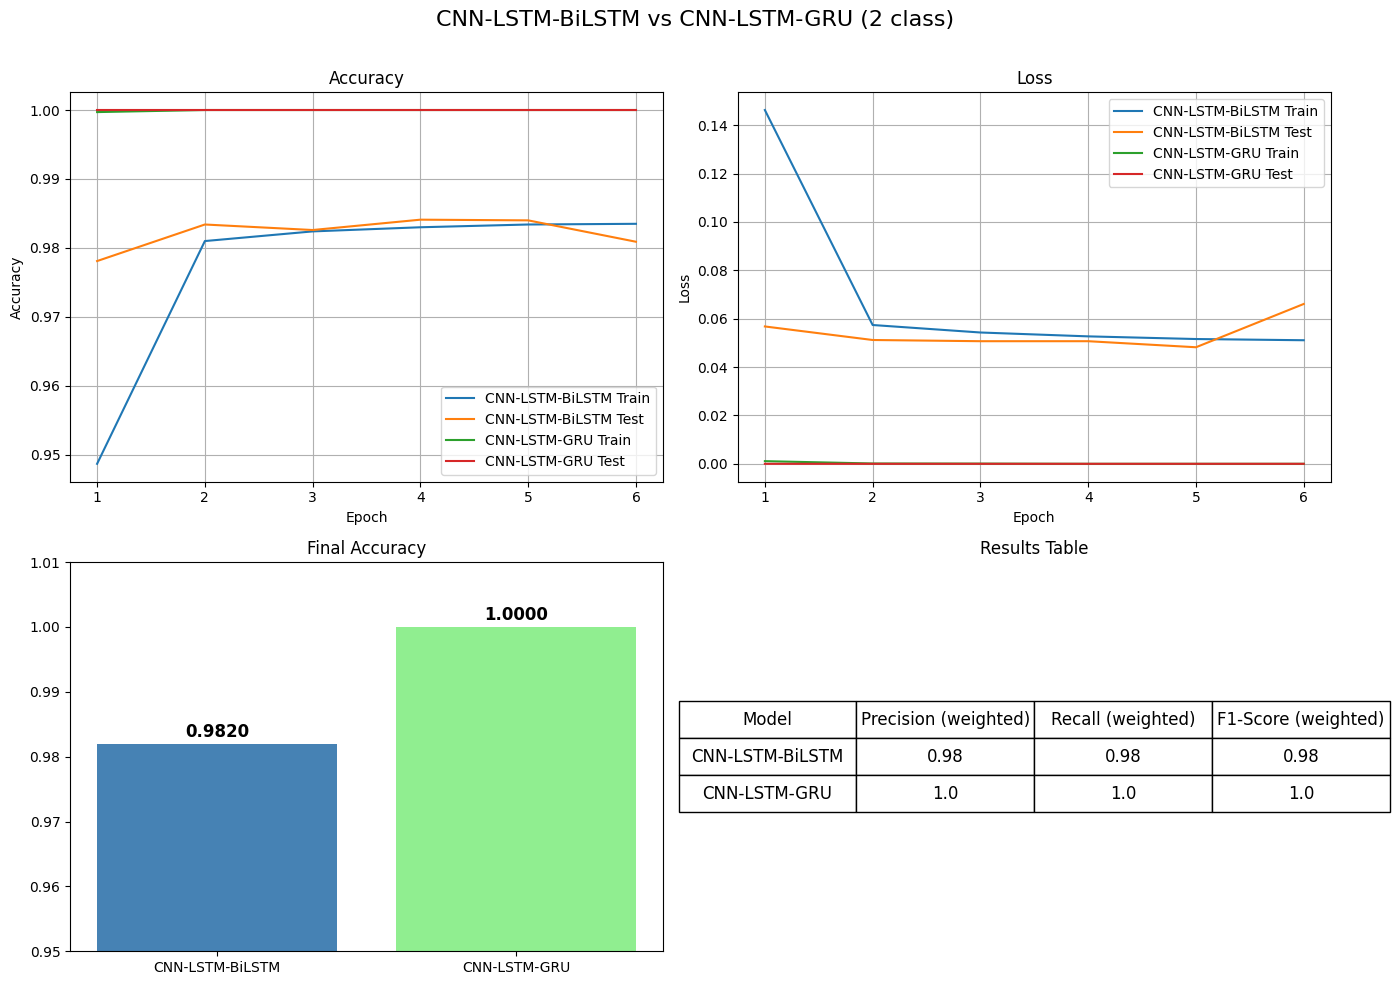

In [ ]:
# 2 Class CNN-LSTM-BiLSTM vs CNN-LSTM-GRU Comparison:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# CNN-LSTM-BiLSTM
cnn_lstm_bilstm_epochs = np.arange(1, 7)
cnn_lstm_bilstm_train_acc = [0.9487, 0.9810, 0.9824, 0.9830, 0.9834, 0.9835]
cnn_lstm_bilstm_test_acc = [0.9781, 0.9834, 0.9826, 0.9841, 0.9840, 0.9809]
cnn_lstm_bilstm_train_loss = [0.1463, 0.0574, 0.0543, 0.0527, 0.0516, 0.0511]
cnn_lstm_bilstm_test_loss = [0.0568, 0.0512, 0.0507, 0.0507, 0.0482, 0.0661]
cnn_lstm_bilstm_final_test_acc = 0.9820
cnn_lstm_bilstm_final_test_loss = 0.0559

# CNN-LSTM-GRU
cnn_lstm_gru_epochs = np.arange(1, 7)
cnn_lstm_gru_train_acc = [0.9997, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]
cnn_lstm_gru_test_acc = [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]
cnn_lstm_gru_train_loss = [0.0011, 0.0001306, 0.000081947, 2.1156e-10, 1.4664e-11, 7.5520e-11]
cnn_lstm_gru_test_loss = [6.0838e-07, 4.6583e-11, 1.1399e-15, 4.3320e-19, 7.3978e-20, 7.3541e-21]
cnn_lstm_gru_final_test_acc = 1.0000
cnn_lstm_gru_final_test_loss = 0.0000


fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("CNN-LSTM-BiLSTM vs CNN-LSTM-GRU (2 class)", fontsize=16)

# accuracy
axs[0, 0].plot(cnn_lstm_bilstm_epochs, cnn_lstm_bilstm_train_acc, label='CNN-LSTM-BiLSTM Train')
axs[0, 0].plot(cnn_lstm_bilstm_epochs, cnn_lstm_bilstm_test_acc, label='CNN-LSTM-BiLSTM Test')
axs[0, 0].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_train_acc, label='CNN-LSTM-GRU Train')
axs[0, 0].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_test_acc, label='CNN-LSTM-GRU Test')
axs[0, 0].set_title("Accuracy")
axs[0, 0].set_xlabel("Epoch")
axs[0, 0].set_ylabel("Accuracy")
axs[0, 0].legend()
axs[0, 0].grid(True)

# loss
axs[0, 1].plot(cnn_lstm_bilstm_epochs, cnn_lstm_bilstm_train_loss, label='CNN-LSTM-BiLSTM Train')
axs[0, 1].plot(cnn_lstm_bilstm_epochs, cnn_lstm_bilstm_test_loss, label='CNN-LSTM-BiLSTM Test')
axs[0, 1].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_train_loss, label='CNN-LSTM-GRU Train')
axs[0, 1].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_test_loss, label='CNN-LSTM-GRU Test')
axs[0, 1].set_title("Loss")
axs[0, 1].set_xlabel("Epoch")
axs[0, 1].set_ylabel("Loss")
axs[0, 1].legend()
axs[0, 1].grid(True)

# accuracy table
models = ['CNN-LSTM-BiLSTM', 'CNN-LSTM-GRU']
test_accs = [cnn_lstm_bilstm_final_test_acc, cnn_lstm_gru_final_test_acc]
axs[1, 0].bar(models, test_accs, color=['steelblue', 'lightgreen'])
axs[1, 0].set_title("Final Accuracy")
axs[1, 0].set_ylim([0.95, 1.01])
for i, acc in enumerate(test_accs):
    axs[1, 0].text(i, acc + 0.001, f"{acc:.4f}", ha='center', fontsize=12, fontweight='bold')

# table
results = pd.DataFrame({
    "Model": models,
    "Precision (weighted)": [0.98, 1.00],
    "Recall (weighted)": [0.98, 1.00],
    "F1-Score (weighted)": [0.98, 1.00]
})
axs[1, 1].axis('off')
table = axs[1, 1].table(cellText=results.values, colLabels=results.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 2.0)
axs[1, 1].set_title("Results Table")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


<h1>Explanation For The Results:</h1>

<p>Based on the results for the 2-class classification, the CNN-LSTM-BiLSTM model showed weaker performance compared to the CNN-LSTM-GRU architecture, despite having bidirectional processing. This is likely due to the fact that the bidirectional processing may lead to worsened results even though it theoretically should produce better results since it is more complex. The CNN-LSTM-BiLSTM model reached a final test accuracy of 98.20% and a final loss of 0.0559, showing good but not perfect classification performance. In contrast, the CNN-LSTM-GRU model achieved 100% accuracy and almost zero loss. The better performance of the CNN-LSTM-GRU architecture can be explained by the way its parts work together. While the BiLSTM component in the first model processes sequences in both forward and backward directions to capture bidirectional temporal dependencies, this added complexity increases computational costs and can lead to overfitting. On the other hand, GRUs simplify the architecture by combining cell and hidden states into a single part, making the model less complex and computationally more efficient compared to LSTMs. When combined with the CNN's spatial feature extraction and the LSTM's temporal sequence processing, the CNN-LSTM-GRU creates a better ensemble that reduces the vanishing gradient problem and improves the model's ability to learn more complex spatial and temporal patterns without the computational costs of bidirectional processing. The CNN-LSTM-GRU's ability to achieve perfect results shows that for this binary classification task, the gating mechanisms provide better outcomes than the bidirectional approach. This also shows that efficiency can sometimes outperform tasks that use more computational costs.</p>

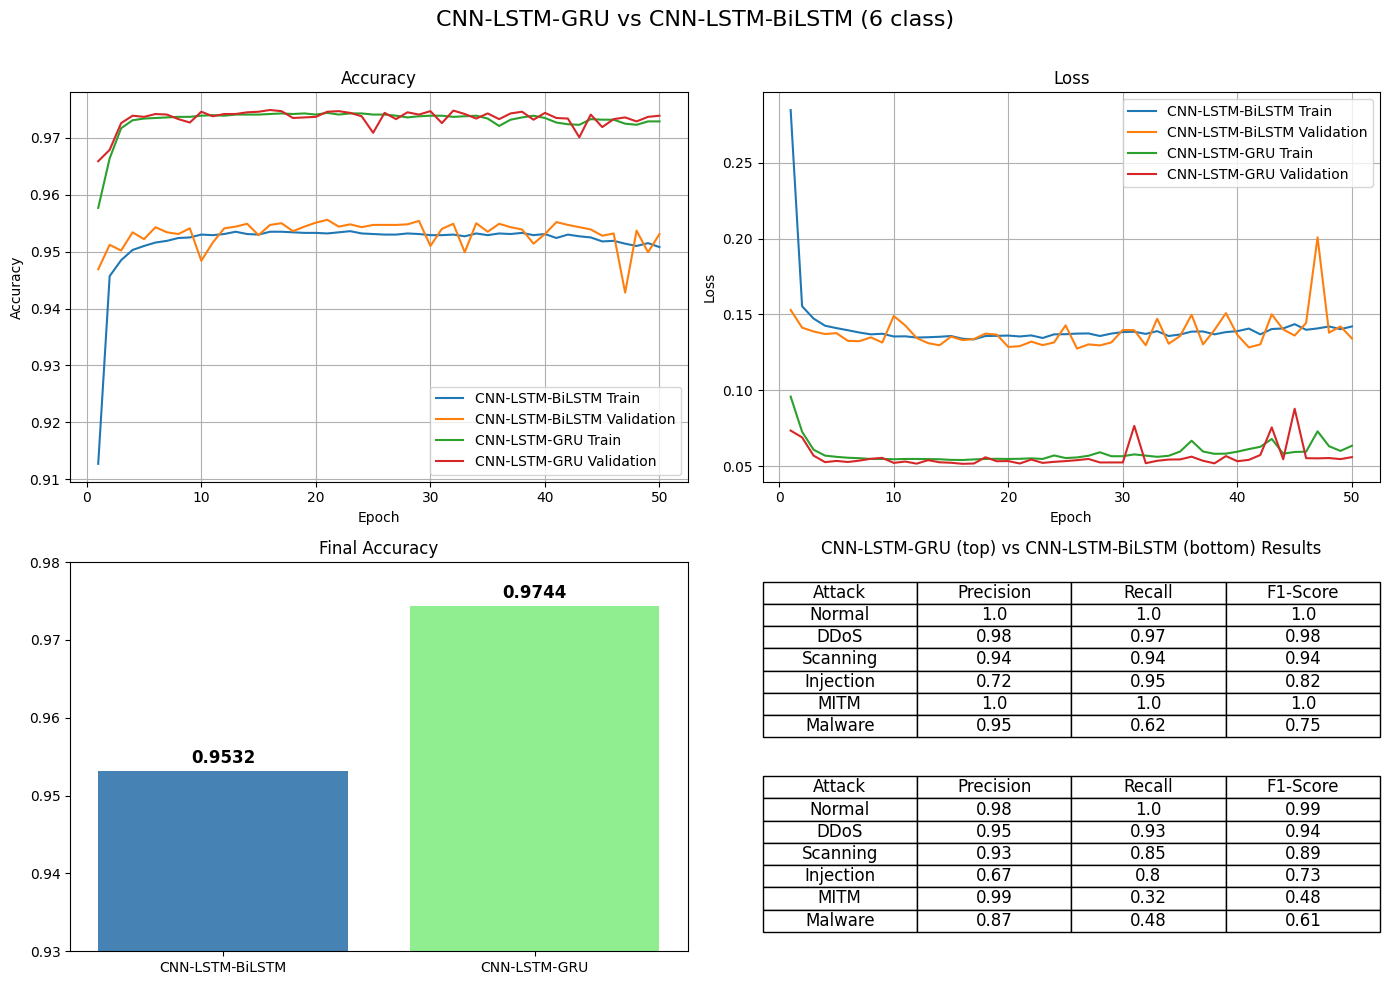

In [ ]:
# 6 Class CNN-LSTM-GRU vs CNN-LSTM-BiLSTM Comparison:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# CNN-LSTM-BiLSTM
cnn_lstm_bilstm_epochs = np.arange(1, 51)
cnn_lstm_bilstm_train_acc = [0.9127, 0.9457, 0.9485, 0.9503, 0.9510, 0.9516, 0.9519, 0.9524, 0.9525, 0.9530, 0.9529, 0.9531, 0.9535, 0.9531, 0.9530, 0.9535, 0.9535, 0.9534, 0.9533, 0.9533, 0.9532, 0.9534, 0.9536, 0.9532, 0.9531, 0.9530, 0.9530, 0.9532, 0.9531, 0.9529, 0.9529, 0.9530, 0.9527, 0.9532, 0.9529, 0.9532, 0.9531, 0.9533, 0.9529, 0.9531, 0.9524, 0.9530, 0.9527, 0.9525, 0.9518, 0.9519, 0.9514, 0.9510, 0.9515, 0.9508]
cnn_lstm_bilstm_val_acc = [0.9469, 0.9512, 0.9502, 0.9534, 0.9522, 0.9543, 0.9534, 0.9531, 0.9541, 0.9484, 0.9516, 0.9541, 0.9544, 0.9549, 0.9529, 0.9547, 0.9550, 0.9536, 0.9544, 0.9551, 0.9556, 0.9544, 0.9548, 0.9543, 0.9547, 0.9547, 0.9547, 0.9548, 0.9554, 0.9510, 0.9540, 0.9549, 0.9499, 0.9550, 0.9535, 0.9549, 0.9543, 0.9539, 0.9514, 0.9531, 0.9552, 0.9547, 0.9543, 0.9539, 0.9528, 0.9532, 0.9428, 0.9537, 0.9499, 0.9531]
cnn_lstm_bilstm_train_loss = [0.2847, 0.1554, 0.1473, 0.1426, 0.1410, 0.1396, 0.1381, 0.1369, 0.1373, 0.1355, 0.1356, 0.1348, 0.1350, 0.1353, 0.1358, 0.1340, 0.1336, 0.1358, 0.1359, 0.1361, 0.1355, 0.1362, 0.1345, 0.1369, 0.1370, 0.1374, 0.1375, 0.1358, 0.1374, 0.1384, 0.1386, 0.1372, 0.1390, 0.1358, 0.1368, 0.1387, 0.1388, 0.1369, 0.1384, 0.1390, 0.1407, 0.1369, 0.1404, 0.1408, 0.1436, 0.1399, 0.1408, 0.1421, 0.1403, 0.1421]
cnn_lstm_bilstm_val_loss = [0.1530, 0.1413, 0.1388, 0.1371, 0.1377, 0.1326, 0.1324, 0.1349, 0.1315, 0.1490, 0.1428, 0.1345, 0.1311, 0.1297, 0.1354, 0.1331, 0.1338, 0.1374, 0.1367, 0.1286, 0.1291, 0.1321, 0.1298, 0.1316, 0.1428, 0.1275, 0.1303, 0.1296, 0.1316, 0.1398, 0.1396, 0.1297, 0.1472, 0.1307, 0.1358, 0.1498, 0.1303, 0.1398, 0.1509, 0.1365, 0.1283, 0.1303, 0.1501, 0.1401, 0.1361, 0.1444, 0.2008, 0.1380, 0.1421, 0.1342]
cnn_lstm_bilstm_final_test_acc = 0.9532
cnn_lstm_bilstm_final_test_loss = 0.1368

# CNN-LSTM-GRU
cnn_lstm_gru_epochs = np.arange(1, 51)
cnn_lstm_gru_train_acc = [0.9577, 0.9664, 0.9717, 0.9731, 0.9734, 0.9735, 0.9736, 0.9737, 0.9737, 0.9739, 0.9740, 0.9739, 0.9741, 0.9741, 0.9741, 0.9742, 0.9743, 0.9742, 0.9743, 0.9741, 0.9744, 0.9741, 0.9743, 0.9743, 0.9741, 0.9741, 0.9739, 0.9736, 0.9738, 0.9739, 0.9739, 0.9737, 0.9738, 0.9739, 0.9734, 0.9721, 0.9732, 0.9736, 0.9739, 0.9735, 0.9727, 0.9724, 0.9723, 0.9733, 0.9732, 0.9732, 0.9725, 0.9723, 0.9729, 0.9729]
cnn_lstm_gru_val_acc = [0.9659, 0.9679, 0.9726, 0.9739, 0.9737, 0.9742, 0.9741, 0.9733, 0.9727, 0.9746, 0.9738, 0.9742, 0.9742, 0.9745, 0.9746, 0.9749, 0.9747, 0.9735, 0.9736, 0.9737, 0.9746, 0.9747, 0.9744, 0.9738, 0.9709, 0.9744, 0.9733, 0.9745, 0.9741, 0.9747, 0.9726, 0.9748, 0.9742, 0.9734, 0.9743, 0.9733, 0.9743, 0.9746, 0.9732, 0.9744, 0.9735, 0.9734, 0.9701, 0.9741, 0.9719, 0.9733, 0.9736, 0.9729, 0.9737, 0.9739]
cnn_lstm_gru_train_loss = [0.0959, 0.0727, 0.0609, 0.0570, 0.0562, 0.0556, 0.0553, 0.0548, 0.0548, 0.0546, 0.0548, 0.0548, 0.0547, 0.0546, 0.0542, 0.0541, 0.0545, 0.0548, 0.0549, 0.0548, 0.0549, 0.0552, 0.0548, 0.0571, 0.0554, 0.0558, 0.0569, 0.0592, 0.0566, 0.0566, 0.0578, 0.0570, 0.0562, 0.0569, 0.0597, 0.0668, 0.0597, 0.0582, 0.0583, 0.0596, 0.0613, 0.0628, 0.0680, 0.0583, 0.0594, 0.0596, 0.0730, 0.0632, 0.0601, 0.0635]
cnn_lstm_gru_val_loss = [0.0735, 0.0690, 0.0570, 0.0527, 0.0535, 0.0528, 0.0537, 0.0549, 0.0555, 0.0522, 0.0531, 0.0517, 0.0540, 0.0526, 0.0523, 0.0516, 0.0518, 0.0559, 0.0533, 0.0534, 0.0518, 0.0544, 0.0522, 0.0529, 0.0534, 0.0540, 0.0548, 0.0525, 0.0525, 0.0525, 0.0766, 0.0520, 0.0536, 0.0544, 0.0545, 0.0563, 0.0536, 0.0519, 0.0567, 0.0533, 0.0542, 0.0574, 0.0756, 0.0546, 0.0879, 0.0553, 0.0552, 0.0554, 0.0547, 0.0560]
cnn_lstm_gru_final_test_acc = 0.9744
cnn_lstm_gru_final_test_loss = 0.0532


fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("CNN-LSTM-GRU vs CNN-LSTM-BiLSTM (6 class)", fontsize=16)

# accuracy
axs[0, 0].plot(cnn_lstm_bilstm_epochs, cnn_lstm_bilstm_train_acc, label='CNN-LSTM-BiLSTM Train')
axs[0, 0].plot(cnn_lstm_bilstm_epochs, cnn_lstm_bilstm_val_acc, label='CNN-LSTM-BiLSTM Validation')
axs[0, 0].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_train_acc, label='CNN-LSTM-GRU Train')
axs[0, 0].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_val_acc, label='CNN-LSTM-GRU Validation')
axs[0, 0].set_title("Accuracy")
axs[0, 0].set_xlabel("Epoch")
axs[0, 0].set_ylabel("Accuracy")
axs[0, 0].legend()
axs[0, 0].grid(True)

# loss
axs[0, 1].plot(cnn_lstm_bilstm_epochs, cnn_lstm_bilstm_train_loss, label='CNN-LSTM-BiLSTM Train')
axs[0, 1].plot(cnn_lstm_bilstm_epochs, cnn_lstm_bilstm_val_loss, label='CNN-LSTM-BiLSTM Validation')
axs[0, 1].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_train_loss, label='CNN-LSTM-GRU Train')
axs[0, 1].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_val_loss, label='CNN-LSTM-GRU Validation')
axs[0, 1].set_title("Loss")
axs[0, 1].set_xlabel("Epoch")
axs[0, 1].set_ylabel("Loss")
axs[0, 1].legend()
axs[0, 1].grid(True)

# accuracy table
models = ['CNN-LSTM-BiLSTM', 'CNN-LSTM-GRU']
test_accs = [cnn_lstm_bilstm_final_test_acc, cnn_lstm_gru_final_test_acc]
axs[1, 0].bar(models, test_accs, color=['steelblue', 'lightgreen'])
axs[1, 0].set_title("Final Accuracy")
axs[1, 0].set_ylim([0.93, 0.98])
for i, acc in enumerate(test_accs):
    axs[1, 0].text(i, acc + 0.001, f"{acc:.4f}", ha='center', fontsize=12, fontweight='bold')

# tables
results_cnn_lstm_gru = pd.DataFrame({
    "Attack": ["Normal", "DDoS", "Scanning", "Injection", "MITM", "Malware"],
    "Precision": [1.00, 0.98, 0.94, 0.72, 1.00, 0.95],
    "Recall": [1.00, 0.97, 0.94, 0.95, 1.00, 0.62],
    "F1-Score": [1.00, 0.98, 0.94, 0.82, 1.00, 0.75]
})

results_cnn_lstm_bilstm = pd.DataFrame({
    "Attack": ["Normal", "DDoS", "Scanning", "Injection", "MITM", "Malware"],
    "Precision": [0.98, 0.95, 0.93, 0.67, 0.99, 0.87],
    "Recall": [1.00, 0.93, 0.85, 0.80, 0.32, 0.48],
    "F1-Score": [0.99, 0.94, 0.89, 0.73, 0.48, 0.61]
})

# CNN-LSTM-GRU table
axs[1, 1].axis('off')
table_cnn_lstm_gru = axs[1, 1].table(cellText=results_cnn_lstm_gru.values, colLabels=results_cnn_lstm_gru.columns, loc='center', cellLoc='center', bbox=[0, 0.55, 1, 0.4])
table_cnn_lstm_gru.auto_set_font_size(False)
table_cnn_lstm_gru.set_fontsize(12)
table_cnn_lstm_gru.scale(1.2, 1.2)

# CNN-LSTM table
table_cnn_lstm_bilstm = axs[1, 1].table(cellText=results_cnn_lstm_bilstm.values, colLabels=results_cnn_lstm_bilstm.columns, loc='center', cellLoc='center', bbox=[0, 0.05, 1, 0.4])
table_cnn_lstm_bilstm.auto_set_font_size(False)
table_cnn_lstm_bilstm.set_fontsize(12)
table_cnn_lstm_bilstm.scale(1.2, 1.2)
axs[1, 1].set_title("CNN-LSTM-GRU (top) vs CNN-LSTM-BiLSTM (bottom) Results")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


<h1>Explanation For The Results:</h1>
<p>Based on the results for the 6-class classification, the CNN-LSTM-BiLSTM model showed weaker performance compared to the CNN-LSTM-GRU architecture, despite having bidirectional processing capabilities. This is likely due to the fact that the bidirectional processing may lead to worsened results even though it theoretically should produce better results since it is more complex, particularly when dealing with multi-class attack detection. The CNN-LSTM-BiLSTM model reached a final test accuracy of 95.32% and a final loss of 0.1368, showing decent but imperfect classification performance across the six attack categories. In contrast, the CNN-LSTM-GRU model achieved 97.44% accuracy and a loss of 0.0532, demonstrating better classification across all attack types with perfect precision and recall for Normal and MITM classes. The better performance of the CNN-LSTM-GRU can be explained by how its parts work together more effectively. While the BiLSTM component in the first model processes sequences in both forward and backward directions to capture bidirectional temporal dependencies, the complexity increases computational costs and can lead to overfitting, especially when attempting to distinguish between similar attack patterns. The 6-class problem amplifies this issue because the model must learn subtle or complex boundaries between different attack types. On the other hand, GRUs simplify the architecture by combining cell and hidden states into a single component, making the model less complex and computationally more efficient compared to LSTMs while maintaining better generalization across multiple classes. When combined with the CNN's spatial feature extraction and the LSTM's temporal sequence processing, the CNN-LSTM-GRU creates a better ensemble that reduces the vanishing gradient problem and improves the model's ability to learn complex spatial and temporal patterns across six attack categories without the computational costs of bidirectional processing. The CNN-LSTM-GRU's superior performance show that for this multi-class cybersecurity classification task, the gating mechanisms provide better discrimination ability than the bidirectional approach, especially with imbalanced classes and complex attack pattern recognition. This shows that architectural efficiency can perform better than approaches that use more computational resources, especially in multi-class scenarios where model complexity can cause a model to perform worse.</p>

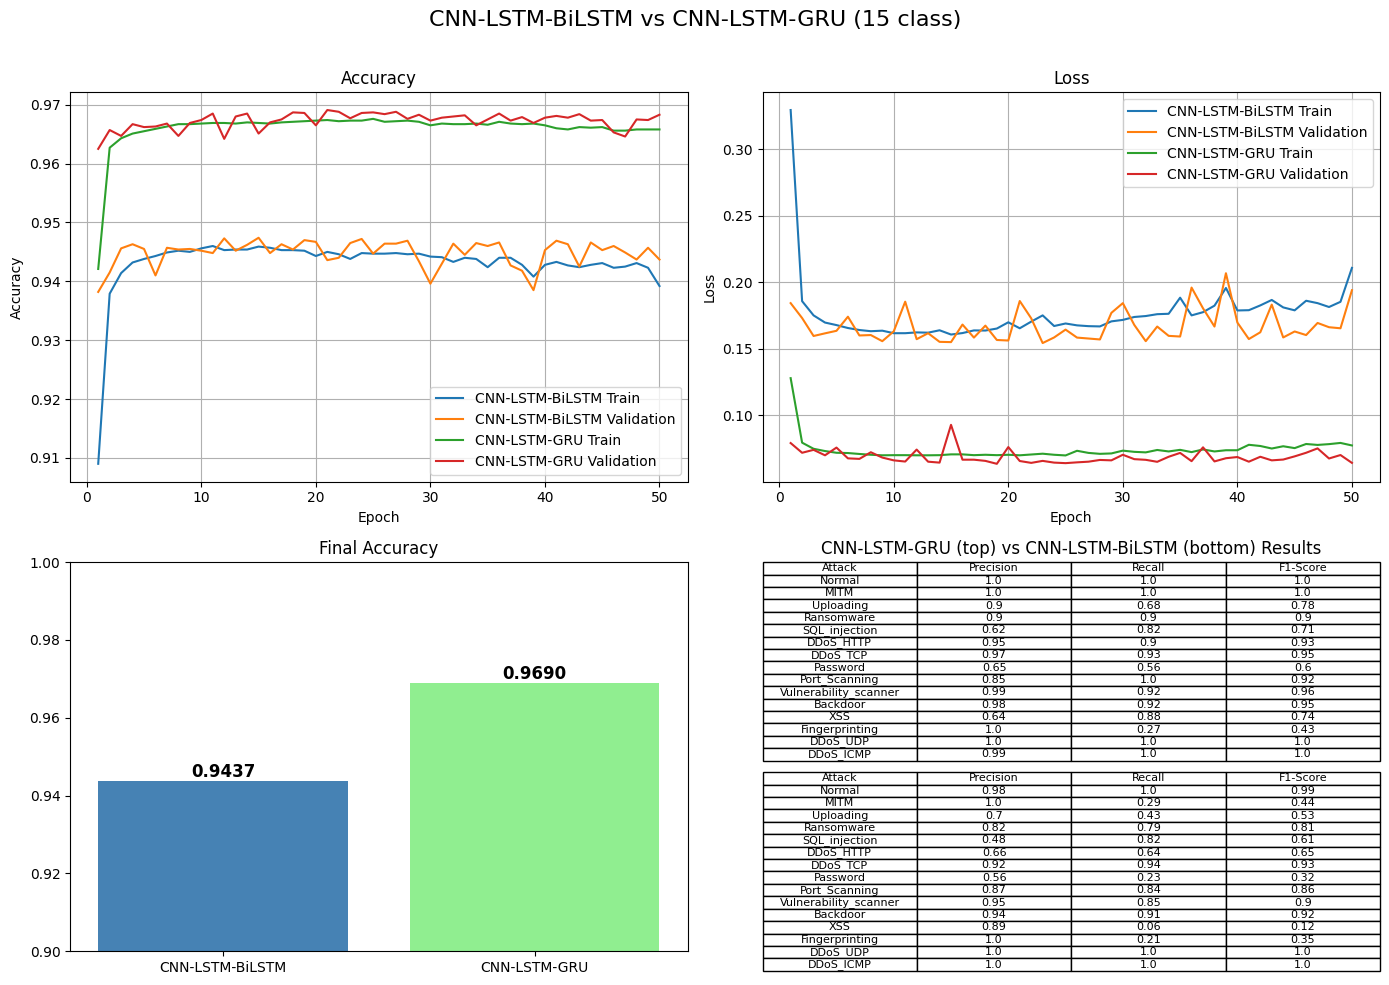

In [25]:
# 15 Class CNN-LSTM-GRU vs CNN-LSTM-BiLSTM Comparison:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# CNN-LSTM-BiLSTM
cnn_lstm_bilstm_epochs = np.arange(1, 51)
cnn_lstm_bilstm_train_acc = [0.9090, 0.9379, 0.9414, 0.9432, 0.9438, 0.9443, 0.9449, 0.9452, 0.9450, 0.9456, 0.9460, 0.9453, 0.9454, 0.9454, 0.9459, 0.9457, 0.9453, 0.9453, 0.9452, 0.9443, 0.9450, 0.9446, 0.9438, 0.9448, 0.9447, 0.9447, 0.9448, 0.9446, 0.9447, 0.9442, 0.9441, 0.9433, 0.9440, 0.9438, 0.9424, 0.9440, 0.9440, 0.9428, 0.9408, 0.9428, 0.9433, 0.9427, 0.9424, 0.9428, 0.9431, 0.9423, 0.9425, 0.9431, 0.9423, 0.9392]
cnn_lstm_bilstm_val_acc = [0.9382, 0.9415, 0.9456, 0.9463, 0.9455, 0.9410, 0.9457, 0.9454, 0.9455, 0.9452, 0.9448, 0.9473, 0.9452, 0.9462, 0.9474, 0.9448, 0.9463, 0.9454, 0.9470, 0.9467, 0.9436, 0.9440, 0.9465, 0.9472, 0.9447, 0.9464, 0.9464, 0.9469, 0.9434, 0.9396, 0.9430, 0.9464, 0.9445, 0.9465, 0.9460, 0.9466, 0.9427, 0.9418, 0.9385, 0.9453, 0.9469, 0.9463, 0.9425, 0.9466, 0.9453, 0.9460, 0.9449, 0.9437, 0.9457, 0.9437]
cnn_lstm_bilstm_train_loss = [0.3295, 0.1858, 0.1751, 0.1697, 0.1678, 0.1656, 0.1641, 0.1632, 0.1636, 0.1617, 0.1617, 0.1623, 0.1621, 0.1639, 0.1607, 0.1618, 0.1638, 0.1637, 0.1652, 0.1699, 0.1654, 0.1704, 0.1751, 0.1671, 0.1690, 0.1676, 0.1670, 0.1668, 0.1706, 0.1717, 0.1739, 0.1746, 0.1760, 0.1763, 0.1884, 0.1751, 0.1775, 0.1824, 0.1957, 0.1788, 0.1790, 0.1826, 0.1867, 0.1811, 0.1789, 0.1861, 0.1843, 0.1814, 0.1853, 0.2108]
cnn_lstm_bilstm_val_loss = [0.1843, 0.1731, 0.1596, 0.1616, 0.1635, 0.1741, 0.1600, 0.1603, 0.1557, 0.1631, 0.1854, 0.1572, 0.1617, 0.1552, 0.1550, 0.1682, 0.1584, 0.1674, 0.1566, 0.1562, 0.1859, 0.1729, 0.1543, 0.1585, 0.1644, 0.1584, 0.1577, 0.1570, 0.1770, 0.1843, 0.1679, 0.1557, 0.1667, 0.1597, 0.1592, 0.1960, 0.1804, 0.1667, 0.2068, 0.1697, 0.1573, 0.1624, 0.1832, 0.1585, 0.1630, 0.1603, 0.1694, 0.1662, 0.1654, 0.1940]
cnn_lstm_bilstm_final_test_acc = 0.9437
cnn_lstm_bilstm_final_test_loss = 0.1949

# CNN-LSTM-GRU
cnn_lstm_gru_epochs = np.arange(1, 51)
cnn_lstm_gru_train_acc = [0.9421, 0.9627, 0.9643, 0.9651, 0.9655, 0.9659, 0.9663, 0.9667, 0.9667, 0.9668, 0.9669, 0.9669, 0.9668, 0.9670, 0.9669, 0.9668, 0.9670, 0.9671, 0.9672, 0.9673, 0.9674, 0.9672, 0.9673, 0.9673, 0.9676, 0.9671, 0.9672, 0.9673, 0.9671, 0.9665, 0.9668, 0.9667, 0.9667, 0.9668, 0.9666, 0.9671, 0.9668, 0.9667, 0.9668, 0.9665, 0.9660, 0.9658, 0.9662, 0.9661, 0.9662, 0.9656, 0.9656, 0.9658, 0.9658, 0.9658]
cnn_lstm_gru_val_acc = [0.9625, 0.9657, 0.9647, 0.9667, 0.9662, 0.9663, 0.9668, 0.9647, 0.9669, 0.9674, 0.9685, 0.9642, 0.9680, 0.9685, 0.9651, 0.9670, 0.9675, 0.9687, 0.9686, 0.9665, 0.9691, 0.9688, 0.9677, 0.9686, 0.9687, 0.9684, 0.9688, 0.9676, 0.9683, 0.9673, 0.9678, 0.9680, 0.9682, 0.9665, 0.9675, 0.9685, 0.9673, 0.9679, 0.9669, 0.9678, 0.9681, 0.9678, 0.9684, 0.9673, 0.9674, 0.9653, 0.9646, 0.9675, 0.9674, 0.9683 ]
cnn_lstm_gru_train_loss = [0.1279, 0.0794, 0.0748, 0.0731, 0.0718, 0.0716, 0.0709, 0.0703, 0.0699, 0.0700, 0.0700, 0.0699, 0.0699, 0.0700, 0.0706, 0.0706, 0.0700, 0.0703, 0.0700, 0.0703, 0.0699, 0.0705, 0.0711, 0.0703, 0.0698, 0.0733, 0.0717, 0.0710, 0.0713, 0.0734, 0.0725, 0.0721, 0.0739, 0.0728, 0.0740, 0.0723, 0.0743, 0.0728, 0.0737, 0.0737, 0.0778, 0.0769, 0.0750, 0.0767, 0.0753, 0.0784, 0.0777, 0.0783, 0.0792, 0.0773]
cnn_lstm_gru_val_loss = [0.0791, 0.0718, 0.0740, 0.0699, 0.0757, 0.0676, 0.0672, 0.0722, 0.0682, 0.0661, 0.0652, 0.0742, 0.0651, 0.0644, 0.0928, 0.0666, 0.0666, 0.0657, 0.0635, 0.0761, 0.0656, 0.0642, 0.0657, 0.0644, 0.0640, 0.0646, 0.0651, 0.0664, 0.0661, 0.0703, 0.0670, 0.0665, 0.0650, 0.0688, 0.0717, 0.0655, 0.0759, 0.0653, 0.0677, 0.0686, 0.0651, 0.0688, 0.0661, 0.0667, 0.0691, 0.0718, 0.0751, 0.0675, 0.0701, 0.0642]
cnn_lstm_gru_final_test_acc = 0.9690
cnn_lstm_gru_final_test_loss = 0.0632


fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("CNN-LSTM-BiLSTM vs CNN-LSTM-GRU (15 class)", fontsize=16)

# accuracy
axs[0, 0].plot(cnn_lstm_bilstm_epochs, cnn_lstm_bilstm_train_acc, label='CNN-LSTM-BiLSTM Train')
axs[0, 0].plot(cnn_lstm_bilstm_epochs, cnn_lstm_bilstm_val_acc, label='CNN-LSTM-BiLSTM Validation')
axs[0, 0].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_train_acc, label='CNN-LSTM-GRU Train')
axs[0, 0].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_val_acc, label='CNN-LSTM-GRU Validation')
axs[0, 0].set_title("Accuracy")
axs[0, 0].set_xlabel("Epoch")
axs[0, 0].set_ylabel("Accuracy")
axs[0, 0].legend()
axs[0, 0].grid(True)

# loss
axs[0, 1].plot(cnn_lstm_bilstm_epochs, cnn_lstm_bilstm_train_loss, label='CNN-LSTM-BiLSTM Train')
axs[0, 1].plot(cnn_lstm_bilstm_epochs, cnn_lstm_bilstm_val_loss, label='CNN-LSTM-BiLSTM Validation')
axs[0, 1].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_train_loss, label='CNN-LSTM-GRU Train')
axs[0, 1].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_val_loss, label='CNN-LSTM-GRU Validation')
axs[0, 1].set_title("Loss")
axs[0, 1].set_xlabel("Epoch")
axs[0, 1].set_ylabel("Loss")
axs[0, 1].legend()
axs[0, 1].grid(True)

# accuracy table
models = ['CNN-LSTM-BiLSTM', 'CNN-LSTM-GRU']
test_accs = [cnn_lstm_bilstm_final_test_acc, cnn_lstm_gru_final_test_acc]
axs[1, 0].bar(models, test_accs, color=['steelblue', 'lightgreen'])
axs[1, 0].set_title("Final Accuracy")
axs[1, 0].set_ylim([0.90, 1.00])
for i, acc in enumerate(test_accs):
    axs[1, 0].text(i, acc + 0.001, f"{acc:.4f}", ha='center', fontsize=12, fontweight='bold')

# table
results_cnn_lstm_gru = pd.DataFrame({
    "Attack": ["Normal", "MITM", "Uploading", "Ransomware", "SQL_injection", "DDoS_HTTP", "DDoS_TCP", "Password", "Port_Scanning", "Vulnerability_scanner", "Backdoor", "XSS", "Fingerprinting", "DDoS_UDP", "DDoS_ICMP"],
    "Precision": [1.00, 1.00, 0.90, 0.90, 0.62, 0.95, 0.97, 0.65, 0.85, 0.99, 0.98, 0.64, 1.00, 1.00, 0.99],
    "Recall": [1.00, 1.00, 0.68, 0.90, 0.82, 0.90, 0.93, 0.56, 1.00, 0.92, 0.92, 0.88, 0.27, 1.00, 1.00],
    "F1-Score": [1.00, 1.00, 0.78, 0.90, 0.71, 0.93, 0.95, 0.60, 0.92, 0.96, 0.95, 0.74, 0.43, 1.00, 1.00]

})

results_cnn_lstm_bilstm = pd.DataFrame({
    "Attack": ["Normal", "MITM", "Uploading", "Ransomware", "SQL_injection", "DDoS_HTTP", "DDoS_TCP", "Password", "Port_Scanning", "Vulnerability_scanner", "Backdoor", "XSS", "Fingerprinting", "DDoS_UDP", "DDoS_ICMP"],
    "Precision": [0.98, 1.00, 0.70, 0.82, 0.48, 0.66, 0.92, 0.56, 0.87, 0.95, 0.94, 0.89, 1.00, 1.00, 1.00],
    "Recall": [1.00, 0.29, 0.43, 0.79, 0.82, 0.64, 0.94, 0.23, 0.84, 0.85, 0.91, 0.06, 0.21, 1.00, 1.00],
    "F1-Score": [0.99, 0.44, 0.53, 0.81, 0.61, 0.65, 0.93, 0.32, 0.86, 0.90, 0.92, 0.12, 0.35, 1.00, 1.00]
})

# CNN-LSTM-GRU table
axs[1, 1].axis('off')
table_cnn_lstm_gru = axs[1, 1].table(cellText=results_cnn_lstm_gru.values, colLabels=results_cnn_lstm_gru.columns, loc='center', cellLoc='center', bbox=[0, 0.49, 1, 0.51])
table_cnn_lstm_gru.auto_set_font_size(False)
table_cnn_lstm_gru.set_fontsize(8)
table_cnn_lstm_gru.scale(1.2, 1.2)

# CNN-LSTM table
table_cnn_lstm_bilstm = axs[1, 1].table(cellText=results_cnn_lstm_bilstm.values, colLabels=results_cnn_lstm_bilstm.columns, loc='center', cellLoc='center', bbox=[0, -0.05, 1, 0.51])
table_cnn_lstm_bilstm.auto_set_font_size(False)
table_cnn_lstm_bilstm.set_fontsize(8)
table_cnn_lstm_bilstm.scale(1.2, 1.2)
axs[1, 1].set_title("CNN-LSTM-GRU (top) vs CNN-LSTM-BiLSTM (bottom) Results")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

<h1>Explanation For The Results:</h1>

<p>Based on the results for the 15-class classification, the CNN-LSTM-BiLSTM model showed weaker performance compared to the CNN-LSTM-GRU architecture, despite having bidirectional processing capabilities. This is likely due to the fact that the bidirectional processing may lead to worsened results even though it theoretically should produce better results since it is more complex. The CNN-LSTM-BiLSTM model reached a final test accuracy of 94.37% and a final loss of 0.1949, showing decent but imperfect classification performance. The model showed terrible performance for MITM attacks (29% recall), XSS attacks (6% recall), Password attacks (23% recall), and Fingerprinting attacks (21% recall), showing difficulties in distinguishing between attack patterns in the 15 classes. In contrast, the CNN-LSTM-GRU model achieved 96.90% accuracy and a loss of 0.0632, showing more consistent classification across all fifteen attack types with perfect precision and recall for Normal, MITM, DDoS_UDP, and DDoS_ICMP classes, while maintaining strong performance on SQL injection and XSS attacks. The CNN-LSTM-GRU architecture perofmred better because the parts work together more effectively. While the BiLSTM component in the first model processes sequences in both forward and backward directions to capture bidirectional temporal dependencies, this added complexity increases computational costs and leads to overfitting issues. The 15 classes highlight these issues because the model must learn subtle and complex boundaries between multiple attack types that may have similar traffic characteristics. On the other hand, GRUs simplify the architecture by combining cell and hidden states into a single component, making the model less complex and computationally more efficient compared to LSTMs. When combined with the CNN's spatial feature extraction and the LSTM's temporal sequence processing, the CNN-LSTM-GRU helps reduce the vanishing gradient problem and improves the model's ability to learn complex spatial and temporal patterns across fifteen attacks without the computational costs and overfitting of bidirectional processing. The CNN-LSTM-GRU's performance shows that for this classification, the gating mechanisms provide better ability to learn patterns and generalization capability than the bidirectional approach. This shows that efficiency and simplicity can sometimes outperform approaches that use more computational resources and complex models.</p>

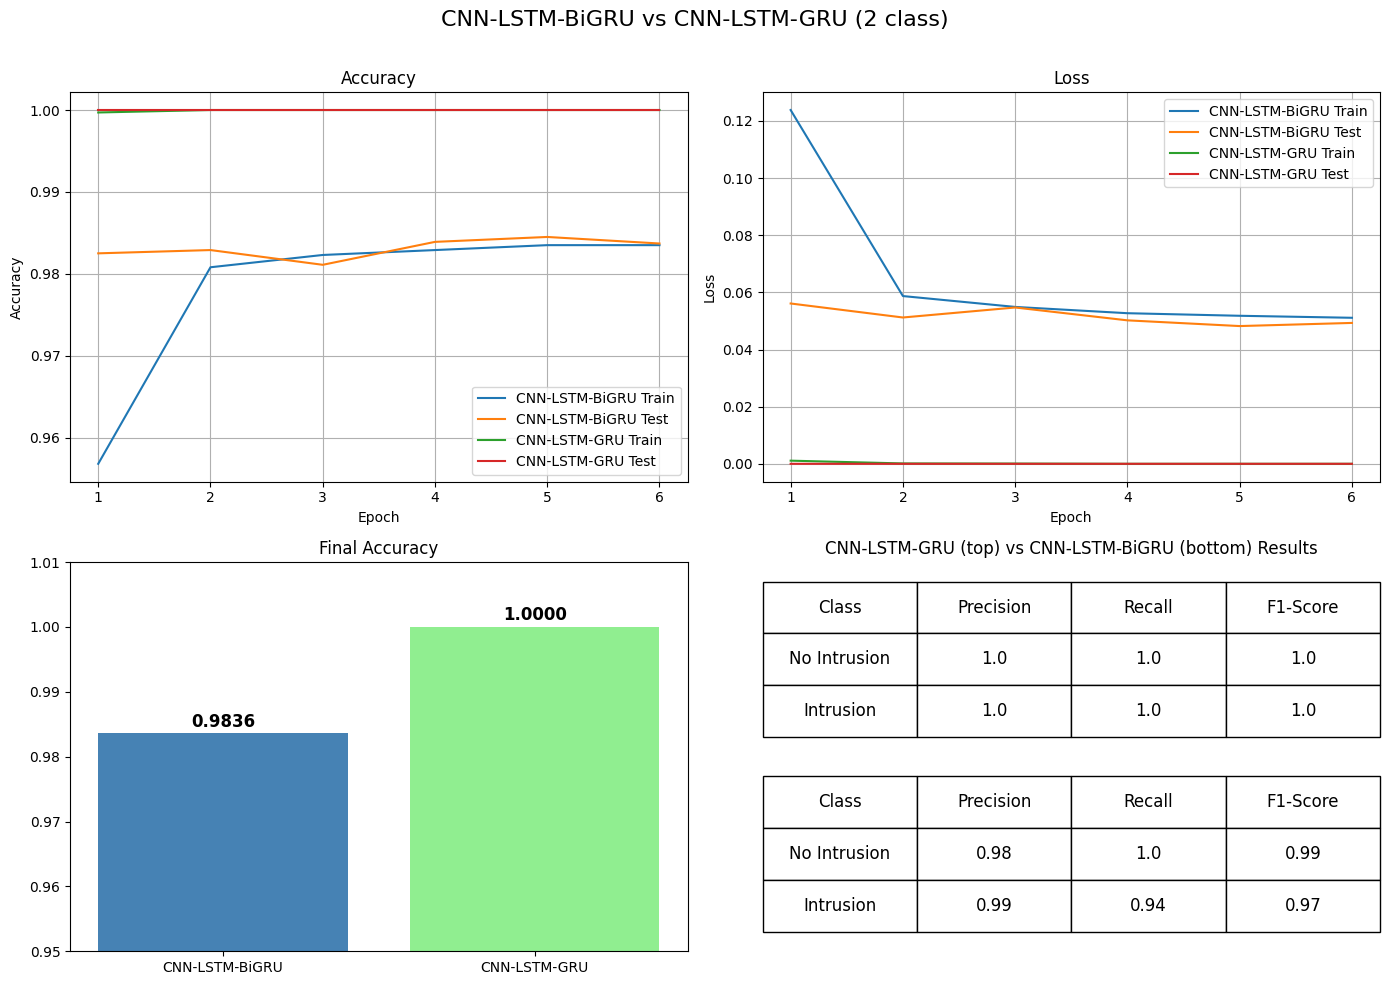

In [ ]:
# 2 Class CNN-LSTM-BiGRU vs CNN-LSTM-GRU Comparison:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# CNN-LSTM-BiGRU
cnn_lstm_bigru_epochs = np.arange(1, 7)
cnn_lstm_bigru_train_acc = [0.9568, 0.9808, 0.9823, 0.9829, 0.9835, 0.9835]
cnn_lstm_bigru_test_acc = [0.9825, 0.9829, 0.9811, 0.9839, 0.9845, 0.9837]
cnn_lstm_bigru_train_loss = [0.1238, 0.0587, 0.0549, 0.0527, 0.0518, 0.0511]
cnn_lstm_bigru_test_loss = [0.0561, 0.0512, 0.0547, 0.0502, 0.0482, 0.0493]
cnn_lstm_bigru_final_test_acc = 0.9836
cnn_lstm_bigru_final_test_loss = 0.0498

# CNN-LSTM-GRU
cnn_lstm_gru_epochs = np.arange(1, 7)
cnn_lstm_gru_train_acc = [0.9997, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]
cnn_lstm_gru_test_acc = [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]
cnn_lstm_gru_train_loss = [0.0011, 0.0001306, 0.000081947, 2.1156e-10, 1.4664e-11, 7.5520e-11]
cnn_lstm_gru_test_loss = [6.0838e-07, 4.6583e-11, 1.1399e-15, 4.3320e-19, 7.3978e-20, 7.3541e-21]
cnn_lstm_gru_final_test_acc = 1.0000
cnn_lstm_gru_final_test_loss = 0.0000


fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("CNN-LSTM-BiGRU vs CNN-LSTM-GRU (2 class)", fontsize=16)

# accuracy
axs[0, 0].plot(cnn_lstm_bigru_epochs, cnn_lstm_bigru_train_acc, label='CNN-LSTM-BiGRU Train')
axs[0, 0].plot(cnn_lstm_bigru_epochs, cnn_lstm_bigru_test_acc, label='CNN-LSTM-BiGRU Test')
axs[0, 0].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_train_acc, label='CNN-LSTM-GRU Train')
axs[0, 0].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_test_acc, label='CNN-LSTM-GRU Test')
axs[0, 0].set_title("Accuracy")
axs[0, 0].set_xlabel("Epoch")
axs[0, 0].set_ylabel("Accuracy")
axs[0, 0].legend()
axs[0, 0].grid(True)

# loss
axs[0, 1].plot(cnn_lstm_bigru_epochs, cnn_lstm_bigru_train_loss, label='CNN-LSTM-BiGRU Train')
axs[0, 1].plot(cnn_lstm_bigru_epochs, cnn_lstm_bigru_test_loss, label='CNN-LSTM-BiGRU Test')
axs[0, 1].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_train_loss, label='CNN-LSTM-GRU Train')
axs[0, 1].plot(cnn_lstm_gru_epochs, cnn_lstm_gru_test_loss, label='CNN-LSTM-GRU Test')
axs[0, 1].set_title("Loss")
axs[0, 1].set_xlabel("Epoch")
axs[0, 1].set_ylabel("Loss")
axs[0, 1].legend()
axs[0, 1].grid(True)

# accuracy tables
models = ['CNN-LSTM-BiGRU', 'CNN-LSTM-GRU']
test_accs = [cnn_lstm_bigru_final_test_acc, cnn_lstm_gru_final_test_acc]
axs[1, 0].bar(models, test_accs, color=['steelblue', 'lightgreen'])
axs[1, 0].set_title("Final Accuracy")
axs[1, 0].set_ylim([0.95, 1.01])
for i, acc in enumerate(test_accs):
    axs[1, 0].text(i, acc + 0.001, f"{acc:.4f}", ha='center', fontsize=12, fontweight='bold')


# tables
results_cnn_lstm_gru = pd.DataFrame({
    "Class": ["No Intrusion", "Intrusion"],
    "Precision": [1.00, 1.00],
    "Recall": [1.00, 1.00],
    "F1-Score": [1.00, 1.00]
})

results_cnn_lstm_bigru = pd.DataFrame({
    "Class": ["No Intrusion", "Intrusion"],
    "Precision": [0.98, 0.99],
    "Recall": [1.00, 0.94],
    "F1-Score": [0.99, 0.97]
})

# CNN-LSTM-GRU table
axs[1, 1].axis('off')
table_cnn_lstm_gru = axs[1, 1].table(cellText=results_cnn_lstm_gru.values, colLabels=results_cnn_lstm_gru.columns, loc='center', cellLoc='center', bbox=[0, 0.55, 1, 0.4])
table_cnn_lstm_gru.auto_set_font_size(False)
table_cnn_lstm_gru.set_fontsize(12)
table_cnn_lstm_gru.scale(1.2, 1.2)

# CNN-LSTM-BiGRU table
table_cnn_lstm_bigru = axs[1, 1].table(cellText=results_cnn_lstm_bigru.values, colLabels=results_cnn_lstm_bigru.columns, loc='center', cellLoc='center', bbox=[0, 0.05, 1, 0.4])
table_cnn_lstm_bigru.auto_set_font_size(False)
table_cnn_lstm_bigru.set_fontsize(12)
table_cnn_lstm_bigru.scale(1.2, 1.2)
axs[1, 1].set_title("CNN-LSTM-GRU (top) vs CNN-LSTM-BiGRU (bottom) Results")



plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


<h1>Explanation For The Results:</h1>

<p>Based on the results for the 2-class classification, the CNN-LSTM-BiGRU model showed weaker performance compared to the CNN-LSTM-GRU, despite having bidirectional processing. This is likely due to the fact that the bidirectional processing may lead to worsened results even though it theoretically should produce better results since it is more complex. The CNN-LSTM-BiGRU model reached a final test accuracy of 98.36% and a final loss of 0.0498, showing good but not perfect performance for intrusion detection. The model particularly struggles with intrusion detection, achieving only 94% recall for the intrusion class. In contrast, the CNN-LSTM-GRU model achieved perfect performance with 100% accuracy and essentially zero loss across all metrics. The better performance of the CNN-LSTM-GRU architecture can be explained by how its components work together more effectively. While the BiGRU component in the first model processes sequences in both forward and backward directions to capture bidirectional temporal dependencies, this added complexity increases computational costs and can lead to overfitting, even in the binary classification scenario. The bidirectional approach introduces more parameters that may not be necessary for distinguishing between "no intrusion" and "intrusion" traffic patterns. On the other hand, GRUs simplify the architecture by combining cell and hidden states into a single component, making the model less complex and computationally more efficient compared to bidirectional processing. When combined with the CNN's spatial feature extraction and the LSTM's temporal sequence processing, the CNN-LSTM-GRU helps reduce the vanishing gradient problem and improves the model's ability to learn spatial and temporal patterns without the computational costs of bidirectional processing. The CNN-LSTM-GRU's ability to achieve perfect results demonstrates that for this binary classification task, the simplified gating mechanisms provide better outcomes than the bidirectional approach. This shows that efficiency and simplicity can outperform approaches that use more computational resources, especially when the task doesn't require the additional bidirectional processing.</p>